In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#display plots inline
%matplotlib inline

In [7]:
df = pd.read_csv('/content/IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


DATA INFORMATION

In [8]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


CHECKING FOR MISSING VALUES

In [9]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [10]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates dropped")

Number of duplicate rows: 3
Duplicates dropped


CLASS DISTRIBUTION

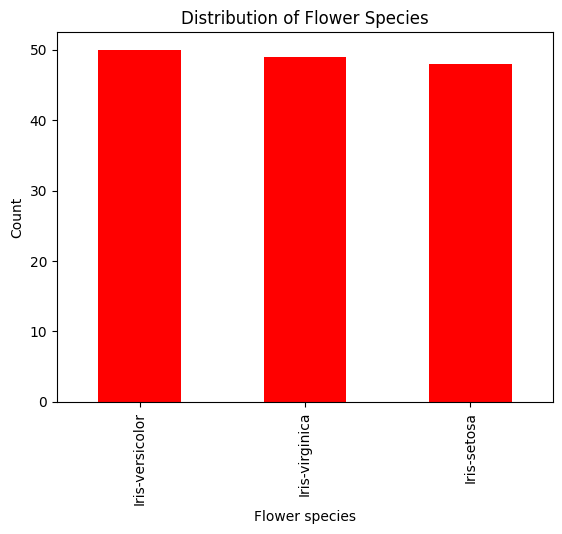

In [11]:
df['species'].value_counts().plot(kind='bar', color='red')
plt.title("Distribution of Flower Species")
plt.xlabel("Flower species")
plt.ylabel("Count")
plt.show()

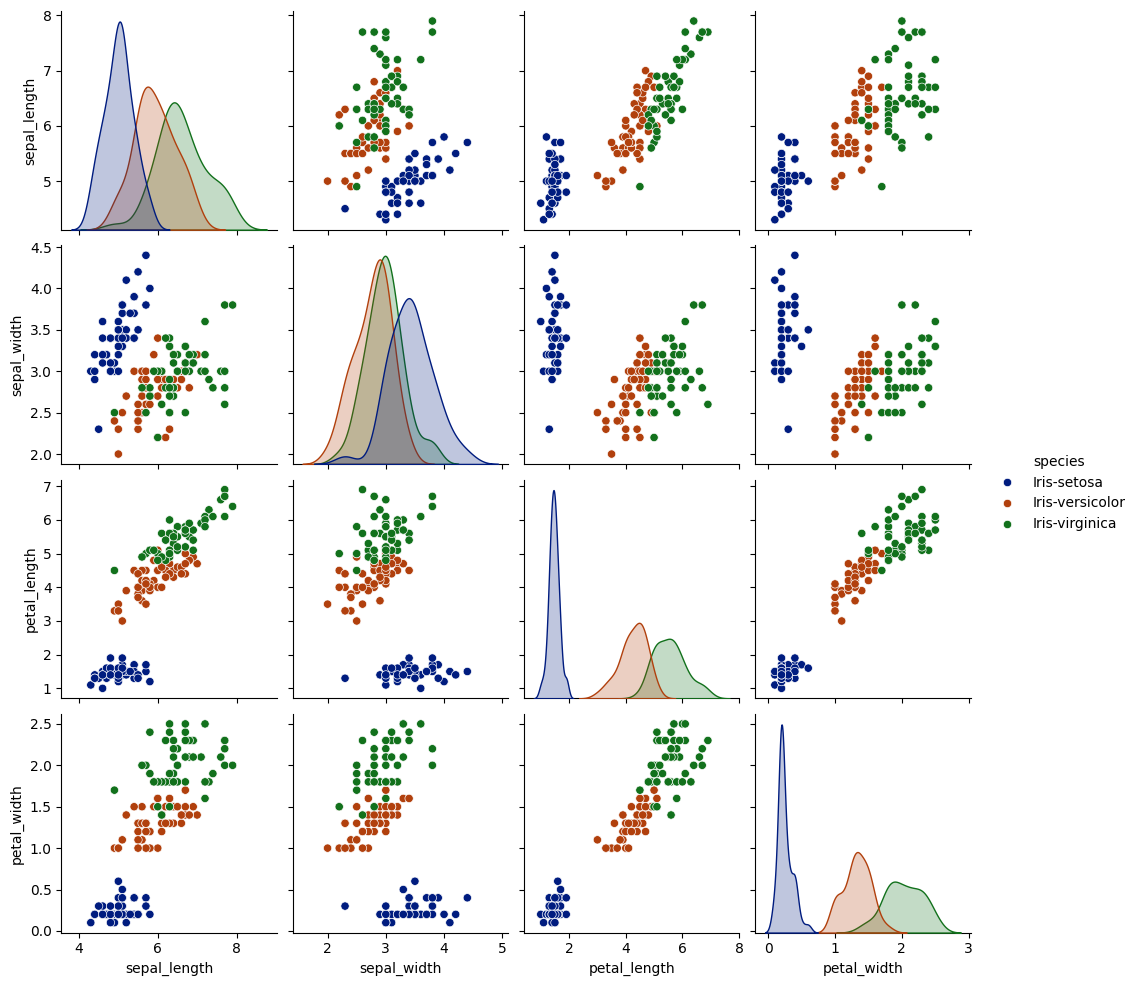

In [12]:
sns.pairplot(df, hue='species', palette='dark')
plt.show()

CORRELATION HEATMAP

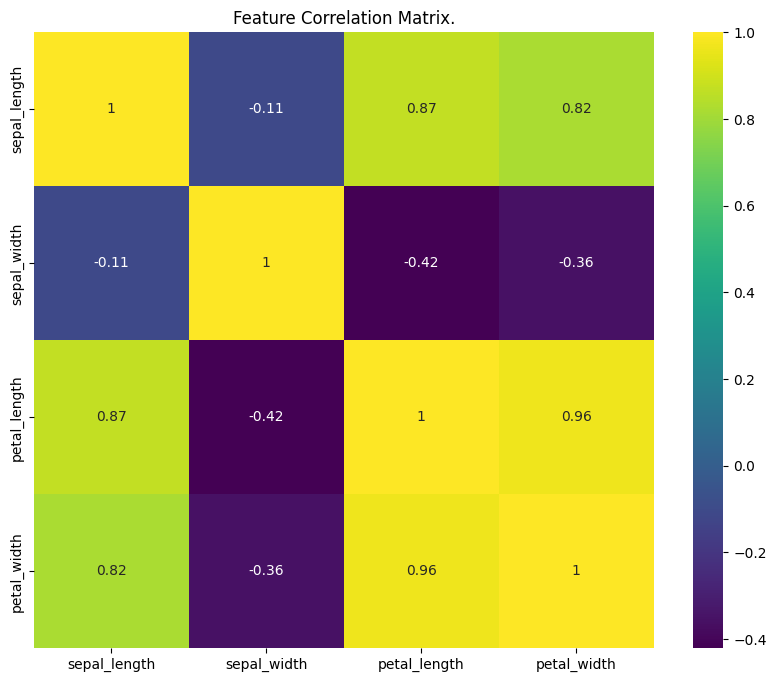

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='viridis')
plt.title("Feature Correlation Matrix.")
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

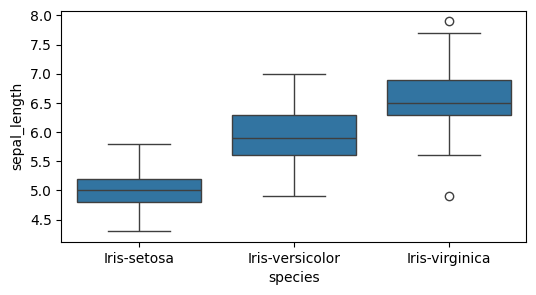

In [14]:
import seaborn as sns
plt.figure(figsize=(6, 3))
sns.boxplot(x='species', y='sepal_length', data=df)

<Axes: xlabel='species', ylabel='sepal_width'>

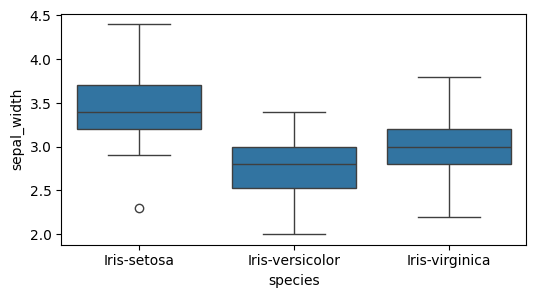

In [15]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='species', y='sepal_width', data=df)

<Axes: xlabel='species', ylabel='petal_width'>

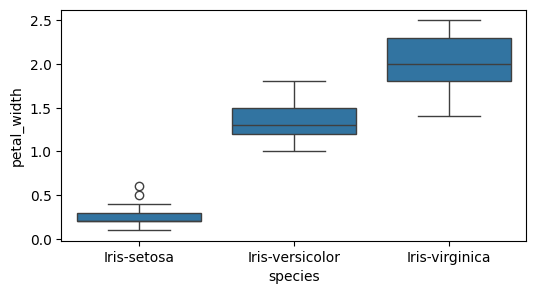

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='species', y='petal_width', data=df)

<Axes: xlabel='species', ylabel='petal_length'>

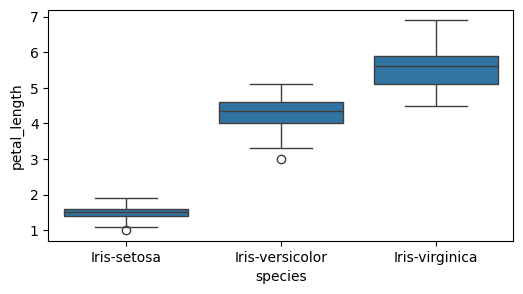

In [17]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='species', y='petal_length', data=df)

Data preprocessing, Supervised Learning

In [18]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('species', axis=1)
y = df['species']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Encoded labels:", np.unique(y_encoded))

Encoded labels: [0 1 2]


In [19]:
df.to_csv('iris_cleaned.csv', index=False)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [21]:
df = pd.read_csv('/content/iris_cleaned.csv')
print("Dataset Loaded")
#Split of features and target
X = df.drop('species', axis=1)
y = df['species']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Target labels encoded")
#First Split: temp (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
#Second split: train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")
#model training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model training completed")
val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

joblib.dump(model, 'iris_model.pkl')
print("Model saved as 'iris_model.pkl'")
joblib.dump(le, 'label_encoder.pkl')
print("Label encoder saved as 'label_encoder.pkl'")
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Dataset Loaded
Target labels encoded
Train set size: 87
Validation set size: 30
Test set size: 30
Model training completed
Validation Accuracy: 0.93
Test Accuracy: 0.87
Model saved as 'iris_model.pkl'
Label encoder saved as 'label_encoder.pkl'

Confusion Matrix (Test Set):
[[10  0  0]
 [ 0  9  1]
 [ 0  3  7]]

Classification Report (Test Set):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.75      0.90      0.82        10
 Iris-virginica       0.88      0.70      0.78        10

       accuracy                           0.87        30
      macro avg       0.88      0.87      0.87        30
   weighted avg       0.88      0.87      0.87        30



TEST PREDICTIONS

In [22]:
model = joblib.load('/content/iris_model.pkl')
le = joblib.load('/content/label_encoder.pkl')
sample = np.array([[5.1, 3.5, 1.4, 0.2]])
sample_df = pd.DataFrame(sample, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
prediction_encoded = model.predict(sample_df)
prediction_label = le.inverse_transform(prediction_encoded)
print("Prediction:", prediction_label[0])

Prediction: Iris-setosa


In [23]:
model = joblib.load('/content/iris_model.pkl')
le = joblib.load('/content/label_encoder.pkl')
sample = np.array([[7, 3.2, 5.5, 0.2]])
sample_df = pd.DataFrame(sample, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
prediction_encoded = model.predict(sample_df)
prediction_label = le.inverse_transform(prediction_encoded)
print("Prediction:", prediction_label[0])

Prediction: Iris-virginica


In [24]:
model = joblib.load('/content/iris_model.pkl')
le = joblib.load('/content/label_encoder.pkl')
sample = np.array([[6.3, 2.5, 2.7, 1.9]])
sample_df = pd.DataFrame(sample, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
prediction_encoded = model.predict(sample_df)
prediction_label = le.inverse_transform(prediction_encoded)
print("Prediction:", prediction_label[0])

Prediction: Iris-versicolor
